In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import wget
import ipykernel

Getting the data
For this homework, we'll use the Laptops Price dataset. Download it from here.

You can do it with wget:
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [165]:
import wget
wget.download("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv","laptops.csv")

Preparing the dataset
First, we'll normalize the names of the columns:

In [166]:
df=pd.read_csv("laptops.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


Next, use only the following columns:

'ram',
'storage',
'screen',
'final_price'

In [167]:
my_df=df[['ram',
'storage',
'screen',
'final_price']]
my_df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


EDA
Look at the final_price variable. Does it have a long tail?

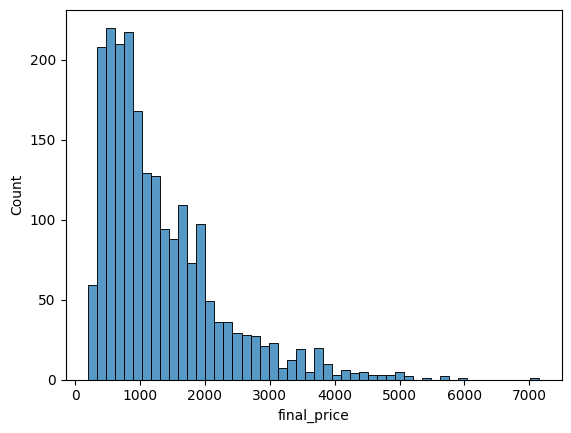

In [210]:
sns.histplot(my_df['final_price'],bins=50)
plt.show()

Yes , its a long tail ditribution

Question 1
There's one column with missing values. What is it?

'ram'
'storage'
'screen'
'final_price'

In [169]:
missing_columns=[col for col in my_df.columns if my_df[col].isna().sum()]
missing_columns

['screen']

In [170]:
my_df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [171]:
print( "Screen has missing value")

Screen has missing value


Question 2
What's the median (50% percentile) for variable 'ram'?

8
16
24
32

In [172]:
print("The median value in ram is ,",my_df['ram'].median())

The median value in ram is , 16.0


Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [173]:
my_df.head()
n=len(my_df)
train=int(n*0.6) #60%
val=int(n*0.2)#20%
test=int(n*0.2)#20%

#shuffle
idx=np.arange(n)
#seed data for consistancy of shuffle
np.random.seed(42)
np.random.shuffle(idx)

In [174]:
df_train=my_df.iloc[idx[0:train]]
df_train.reset_index(inplace=True)
df_train.head()

,index,ram,storage,screen,final_price
0,2079,32,1000,15.6,1123.29
1,668,4,64,14.1,201.05
2,2073,32,1000,14.0,997.74
3,1113,16,512,13.3,1016.00
4,788,32,1000,16.0,2739.00


In [175]:
df_val=my_df.iloc[idx[train:train+val]]
df_val.reset_index(inplace=True)
df_val.head()

,index,ram,storage,screen,final_price
0,132,32,1000,16.0,2599.00
1,80,16,512,15.6,999.00
2,1706,12,512,15.6,477.28
3,1769,8,256,13.6,1519.00
4,541,8,512,15.6,402.99


In [176]:
df_test=my_df.iloc[idx[train+val:]]
df_test.reset_index(inplace=True)
df_test.head()

,index,ram,storage,screen,final_price
0,1925,32,1000,15.6,4805.65
1,612,16,512,13.0,2189.00
2,443,16,512,15.6,1349.00
3,1002,16,512,15.0,2175.83
4,1077,16,1000,15.6,1248.59


In [177]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [178]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

Linear regression function

In [179]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

In [180]:
base_cols = ['ram', 'storage', 'screen']

In [181]:
#prepare feature X
def prepare_X_zero(df):
    df = df.copy()

    df_num = df[base_cols]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [182]:
#prepare Root mean square error formula
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [183]:
#training data
X_train = prepare_X_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred)

np.float64(0.44632651855038796)

In [184]:
#validation data
X_val = prepare_X_zero(df_val)
y_pred = w0 + X_val.dot(w)
rmse_score_zero = rmse(y_val, y_pred)



In [185]:
def prepare_X_mean(df):
    df = df.copy()

    df_num = df[base_cols]
    for col in base_cols:
        df_num[col] = df_num[col].fillna(df_num[col].mean())
    X = df_num.values
    return X



In [186]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred)


C:\Users\vidya\AppData\Local\Temp\ipykernel_7452\3515120037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = df_num[col].fillna(df_num[col].mean())


np.float64(0.4460856669097624)

In [187]:
X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
rmse_score_mean = rmse(y_val, y_pred)

C:\Users\vidya\AppData\Local\Temp\ipykernel_7452\3515120037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = df_num[col].fillna(df_num[col].mean())


In [188]:
#compare rmse for zero and mean


np.round(rmse_score_zero, 2), np.round(rmse_score_mean, 2)

(np.float64(0.43), np.float64(0.43))

In [189]:
print("Both are equally good as per above comparision above")

Both are equally good as per above comparision above


In [190]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

0
0.01
1
10
100

In [191]:
X_train = prepare_X_zero(df_train)

regs = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in regs:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_train.dot(w)
    rms = rmse(y_train, y_pred)
    print(r, rms)

0 0.44632651855038796
0.01 0.4463268765168426
0.1 0.4463617286354735
1 0.4493237086215199
5 0.4865639226256172
10 0.5348065324681499
100 0.7118451710245154


In [192]:
print("best RMSE value as per the above result is 0.01")

best RMSE value as per the above result is 0.01


Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

19.176
29.176
39.176
49.176
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable

In [193]:
def prepare_X(df):
    df = df.copy()
    features = base_cols.copy()
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X
prepare_X(df)

array([[   8. ,  512. ,   15.6],
       [   8. ,  256. ,   15.6],
       [   8. ,  256. ,   15.6],
       ...,
       [  32. , 1000. ,   17.3],
       [  16. , 1000. ,   13.4],
       [  16. ,  256. ,   13.4]])

In [194]:
X_train = prepare_X(df_train)

regs = [0, 0.01, 1, 10, 100]

for r in regs:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_train.dot(w)
    rms = rmse(y_train, y_pred)
    print(r, rms)

0 0.44632651855038796
0.01 0.4463268765168426
1 0.4493237086215199
10 0.5348065324681499
100 0.7118451710245154


In [195]:
#rmse value taken 
w0, w = train_linear_regression_reg(X_train, y_train, 0.01)

In [196]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4288516360534068)

In [197]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [198]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4199464705774921)

In [199]:
df_test.iloc[20]

index      726.0
ram          8.0
storage    512.0
screen      15.6
Name: 20, dtype: float64

In [200]:
laptop = df_test.iloc[20].to_dict()
df_small = pd.DataFrame([laptop])
df_small

,index,ram,storage,screen
0,726.0,8.0,512.0,15.6


In [201]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(6.695353092952126)

In [202]:
np.expm1(y_pred)

np.float64(807.6394086840733)

In [203]:
y_test[20]
np.expm1(y_test[20])

np.float64(502.0)

In [204]:
def split_df(df, seed):
    n = len(df)
    val = int(n * 0.2)
    test = int(n * 0.2)
    train = n - (val + test)

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:train]]
    df_val = df.iloc[idx[train:train+val]]
    df_test = df.iloc[idx[train+val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    return df_train, df_val, df_test, y_train, y_val, y_test


In [205]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    df_train, df_val, df_test, y_train, y_val, y_test = split_df(df, seed)
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    scores.append(rmse(y_val, y_pred))
scores

[np.float64(565.4520868770983),
 np.float64(636.7985423056728),
 np.float64(588.9558697907958),
 np.float64(597.8148920012524),
 np.float64(571.9627915111038),
 np.float64(573.2383256618933),
 np.float64(647.343832840719),
 np.float64(550.4398184485982),
 np.float64(587.3335036169883),
 np.float64(576.1017929433114)]

In [206]:
round(np.std(scores), 3)

np.float64(29.176)

In [207]:
print("The value for STD is 29.176")

The value for STD is 29.176


Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

598.60
608.60
618.60
628.60

In [208]:
df_train, df_val, df_test, y_train, y_val, y_test = split_df(df, 9)
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X_zero(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X_zero(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(608.6099822049573)